# Healthcare Course-end Project 2 :->  By Pavan Lande

### DESCRIPTION

### Problem Statement
#### 1. NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
#### 2.The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
#### 3.Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Dataset Description
#### The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

### Variables	Description
#### Pregnancies	Number of times pregnant
#### Glucose	Plasma glucose concentration in an oral glucose tolerance test
#### BloodPressure	Diastolic blood pressure (mm Hg)
#### SkinThickness	Triceps skinfold thickness (mm)
#### Insulin	Two hour serum insulin
#### BMI	Body Mass Index
#### DiabetesPedigreeFunction	Diabetes pedigree function
#### Age	Age in years
#### Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(color_codes=True)
sns.set(style='white')

In [2]:
df= pd.read_csv(r'C:\DATA SCIENCE CLASS\Online Class Lectures\DATA SCIENCE CLASS SEP-22 COHORT\Data Science Job Guarantee Bootcamp Capstone\Simplilearn Project DATA Set & Solution\Project_2\health care diabetes.csv')

In [3]:
df.head()  # To check the initial rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Project Task: Week 1
### Data Exploration:
#### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
#### • Glucose • BloodPressure • SkinThickness • Insulin  • BMI 

In [5]:
df.describe()  # statistical summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Findings:- 1. All are numerical variables ( dtypes:- int64, float64) 2. 768 rows and 9 features ( 8 independant variables and 1 dependant variable) 3. No missing values are noted in the statistical summary 4. Outliers noticed in Pregnancies and Insulin feature 5. Value zero noticed in columns like 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'. This indicates missing value and must be treated 6. Outcome is the target variable which is binary (either 0 or 1) 7. This is not an imbalanced dataset, with 65% , zero outcomes and 35% one outcomes 8. There is a need to standardize the dataset, since values of variables are in different scale

#### 2. Visually explore these variables using histograms. Treat the missing values accordingly.

Value zero is noticed in columns like 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'. This does not makes sense. This indicates missing value and must be treated

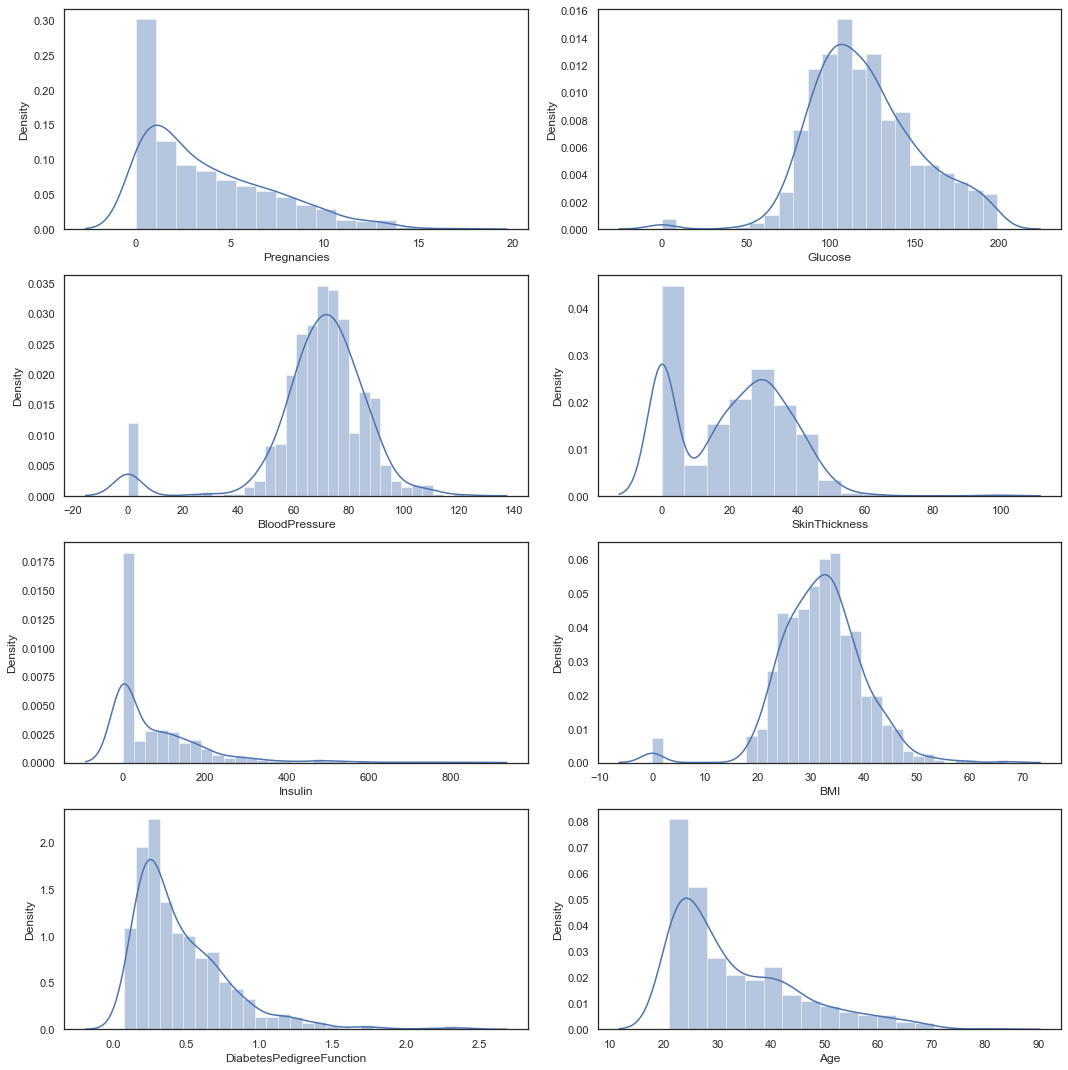

In [10]:
feature_cols=[col for col in df.columns if col != 'Outcome']

plt.figure(figsize=(15,15))
for i, feature in enumerate(feature_cols):
    rows = int(len(feature_cols)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(df[feature])

plt.tight_layout()
plt.show()

In [11]:
# Finding skewness in the features
from scipy.stats import skew
negative_skew=[]
positive_skew=[]
for feature in feature_cols:
    print("Skewness of {0} is {1}". format(feature, skew(df[feature])), end='\n')
    if skew(df[feature]) <0:
        negative_skew.append(feature)
    else:
        positive_skew.append(feature)

print(end="\n")
print("Negatively skewed Features are {}".format(negative_skew), end='\n')
print("Positively skewed Features are {}".format(positive_skew), end='\n')

print("Negatively skewed feature")

Skewness of Pregnancies is 0.8999119408414357
Skewness of Glucose is 0.17341395519987735
Skewness of BloodPressure is -1.8400052311728738
Skewness of SkinThickness is 0.109158762323673
Skewness of Insulin is 2.2678104585131753
Skewness of BMI is -0.42814327880861786
Skewness of DiabetesPedigreeFunction is 1.9161592037386292
Skewness of Age is 1.127389259531697

Negatively skewed Features are ['BloodPressure', 'BMI']
Positively skewed Features are ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
Negatively skewed feature


In [12]:
# Percantage of missing values in features
for col in feature_cols:
    df[col].replace(0,np.nan,inplace=True)
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by=['percent_missing'], inplace=True, ascending=False)
missing_value_df.set_index(keys=['column_name'],drop=True)

,percent_missing
column_name,
Insulin,48.697917
SkinThickness,29.557292
Pregnancies,14.453125
BloodPressure,4.557292
BMI,1.432292
Glucose,0.651042
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


In [13]:
# Missing value imputaion using mean
for col in feature_cols:
    df[col].fillna(int(df[col].mean()),inplace=True)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
for col in feature_cols:
    if col not in ['BMI','DiabetesPedigreeFunction']:
        df[col]=df[col].apply(lambda x:int(x))

#### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [16]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,29,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1


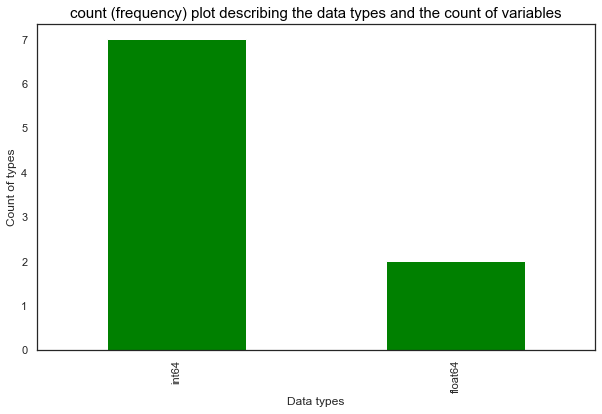

In [18]:
plt.figure(figsize=(10,6))
df.dtypes.value_counts().plot(kind='bar', color='green')
plt.title("count (frequency) plot describing the data types and the count of variables", fontsize=15,loc='center', color='Black')
plt.xlabel("Data types")
plt.ylabel("Count of types")
plt.show()

### Project Task: Week 2
#### Data Exploration:
#### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

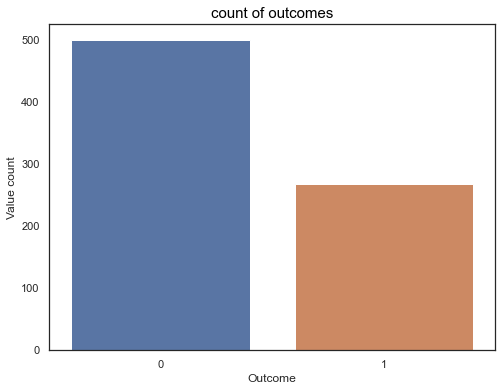

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(df['Outcome'])
plt.title("count of outcomes", fontsize=15,loc='center', color='Black')
plt.xlabel("Outcome")
plt.ylabel("Value count")
plt.show()

Data is not imbalanced, since both classes, majority and minority are both almost equally present in the dataset ( 65% & 34%)

#### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

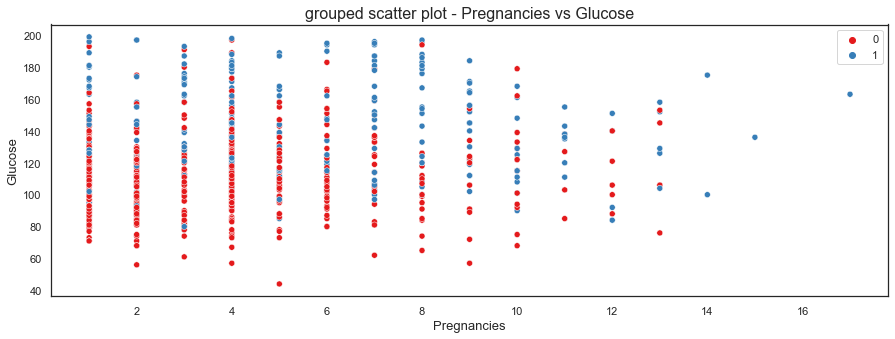

In [20]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Pregnancies',y='Glucose',data=df,hue='Outcome',palette="Set1")
plt.xlabel('Pregnancies', fontsize=13)
plt.ylabel('Glucose', fontsize=13)
plt.title('grouped scatter plot - Pregnancies vs Glucose',fontsize=16)
plt.legend()
plt.show()

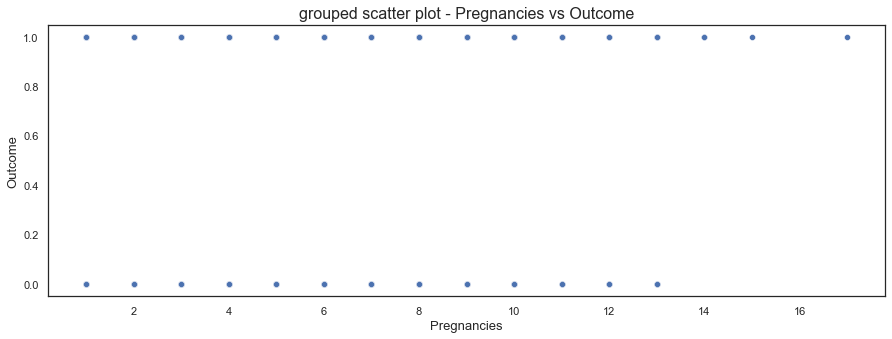

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Pregnancies',y='Outcome',data=df,palette="Set1")
plt.xlabel('Pregnancies', fontsize=13)
plt.ylabel('Outcome', fontsize=13)
plt.title('grouped scatter plot - Pregnancies vs Outcome',fontsize=16)
plt.show()

1. Patient can be a diabetic, irrespective of the preganancy and glucose values, since diabetic positive outcome can be noted across the dataset.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


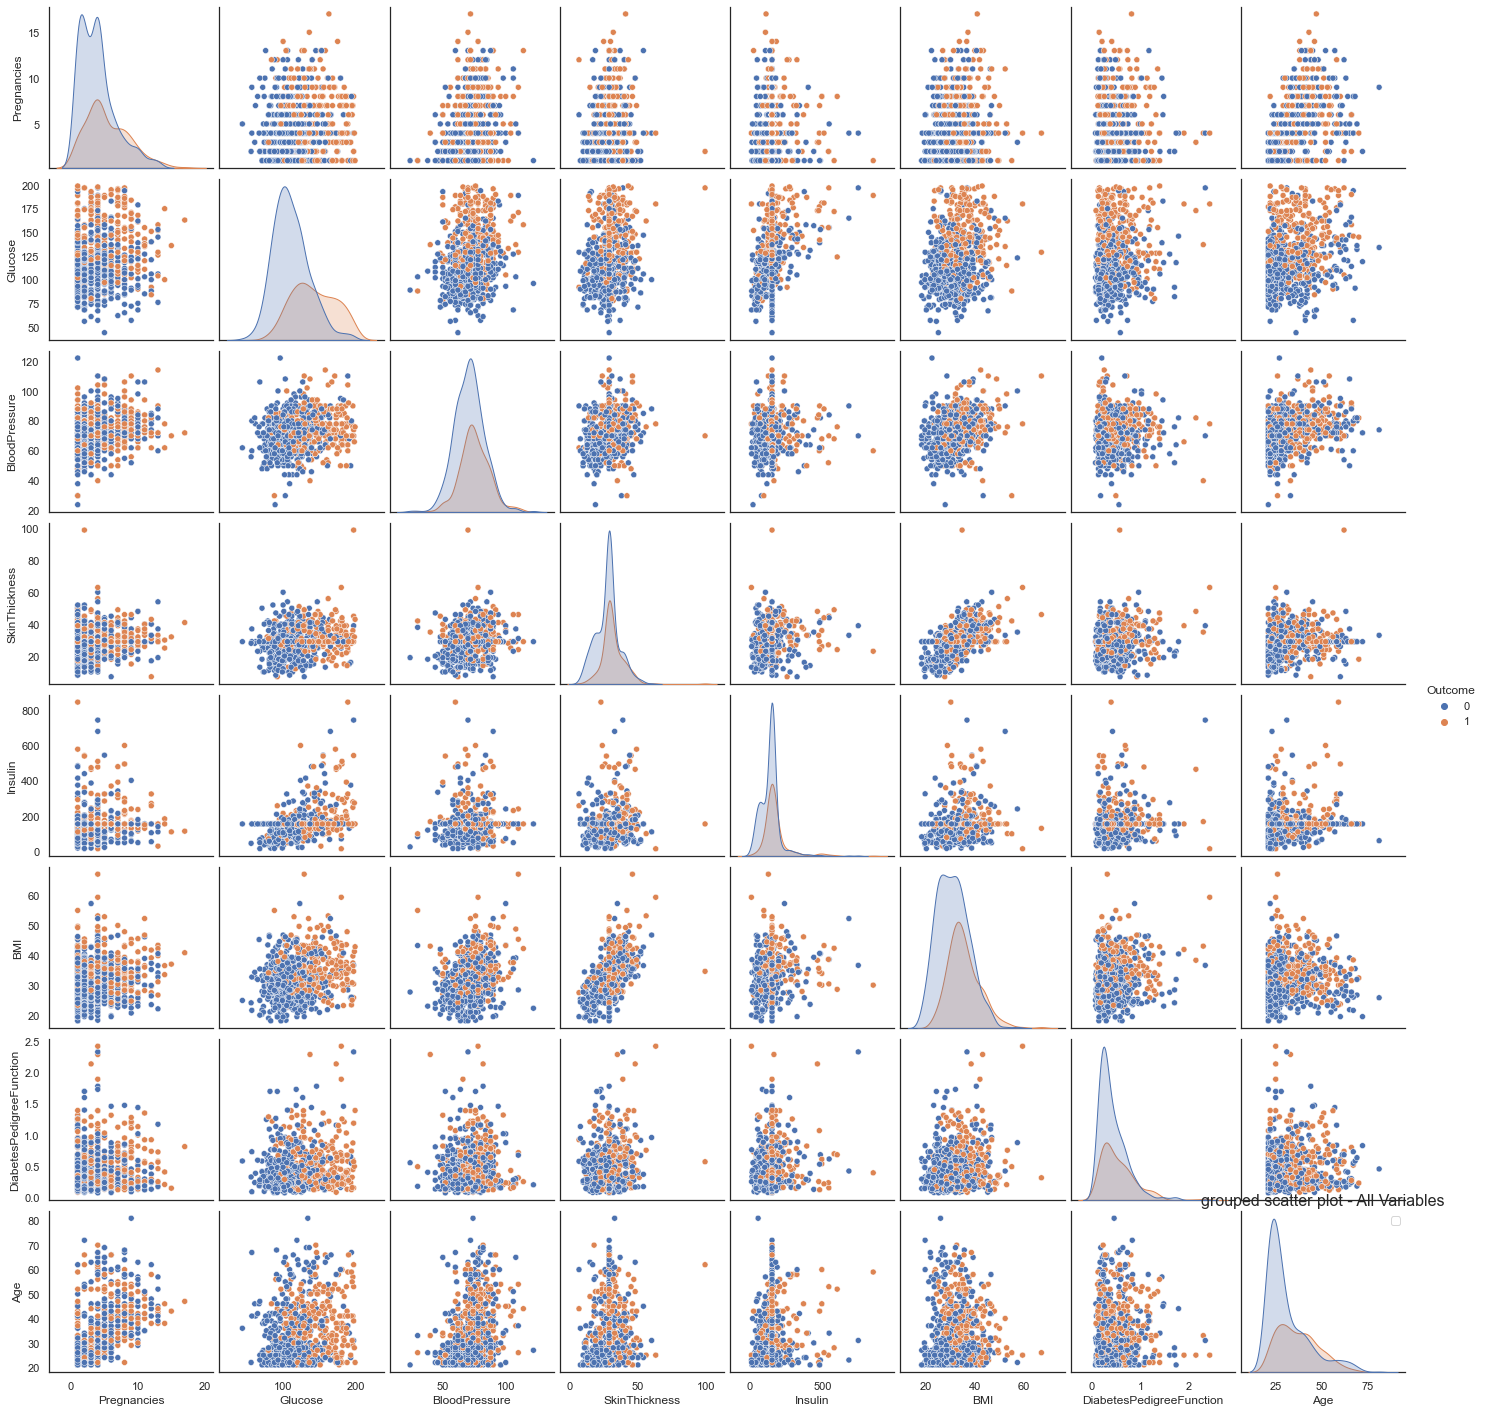

In [22]:
sns.pairplot(df, hue='Outcome')
plt.title('grouped scatter plot - All Variables',fontsize=16)
plt.legend()
plt.show()

1.Positive diabetic outcome noted for higher values of the IVs

2.BMI and skin thickness have a positive linear realtionship

3.Higher BMIs are more at risk of high values of BP, Glucose etc

4.Insulin is taken by a bigger percantage of diabetic patients

#### 3. Perform correlation analysis. Visually explore it using a heat map.

In [23]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.153070,0.255967,0.126082,0.066832,0.100746,-0.009198,0.522303,0.248172
Glucose,0.153070,1.000000,0.218615,0.192677,0.420301,0.231470,0.137100,0.266591,0.492911
BloodPressure,0.255967,0.218615,1.000000,0.191892,0.072041,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.126082,0.192677,0.191892,1.000000,0.158133,0.543275,0.102188,0.126107,0.214873
Insulin,0.066832,0.420301,0.072041,0.158133,1.000000,0.166946,0.099170,0.136050,0.214278
BMI,0.100746,0.231470,0.281132,0.543275,0.166946,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.009198,0.137100,-0.002378,0.102188,0.099170,0.153506,1.000000,0.033561,0.173844
Age,0.522303,0.266591,0.324915,0.126107,0.136050,0.025744,0.033561,1.000000,0.238356
Outcome,0.248172,0.492911,0.165723,0.214873,0.214278,0.312249,0.173844,0.238356,1.000000


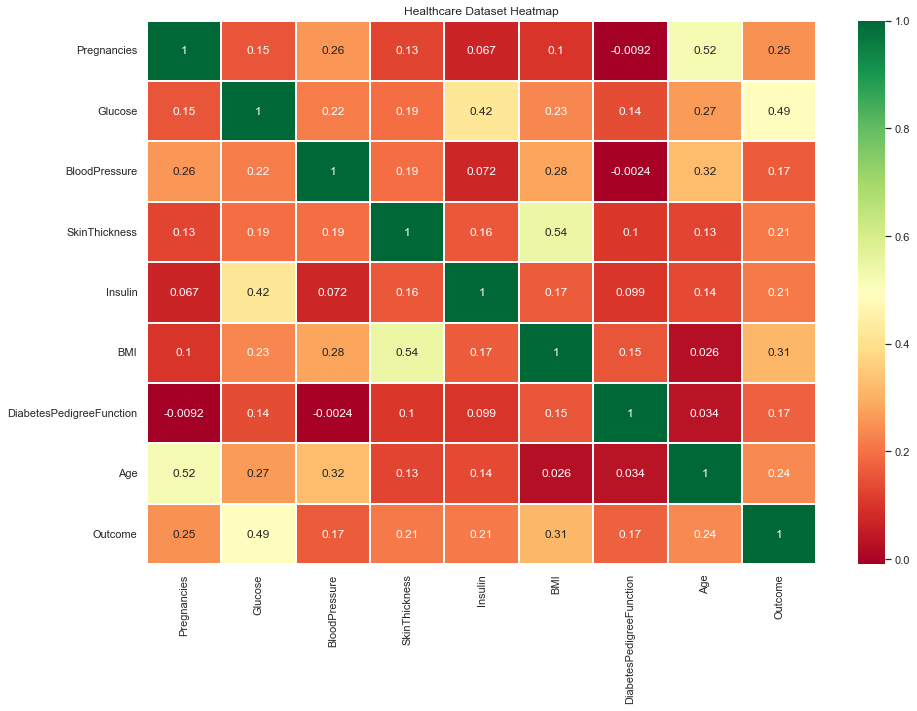

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr,  annot=True,cmap='RdYlGn', linewidths=0.30)
plt.title("Healthcare Dataset Heatmap")
plt.show()

# Some strong positive correlation is noted between independant variables

(9.5, -0.5)

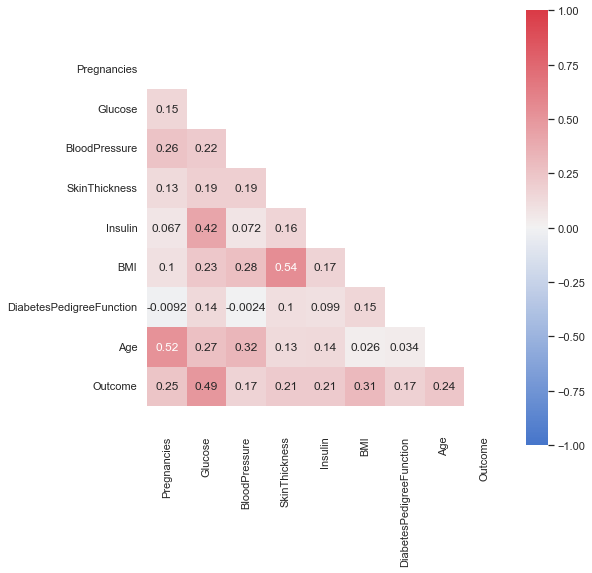

In [25]:
# Correlation Matrix Heatmap Visualization (should run this code again after removing outliers/zero values)
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
## Some strong positive correlation is noted between independant variables

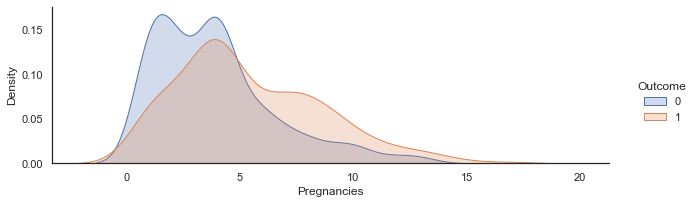

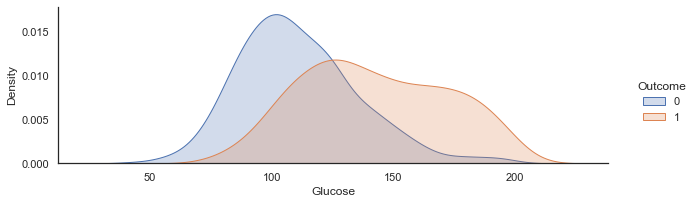

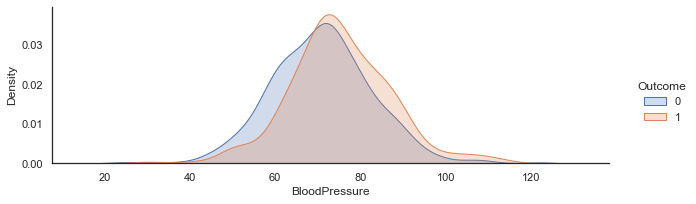

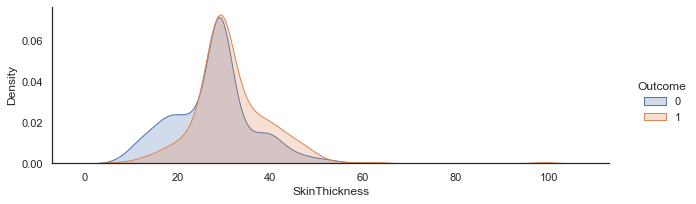

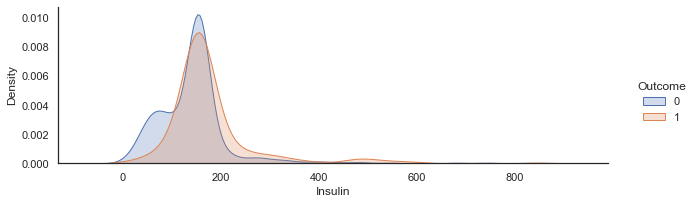

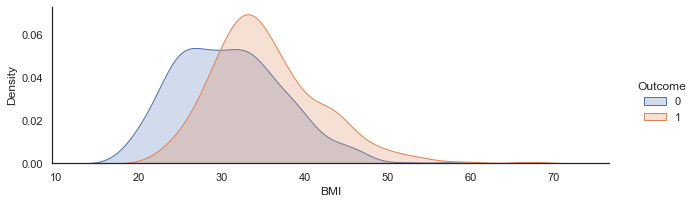

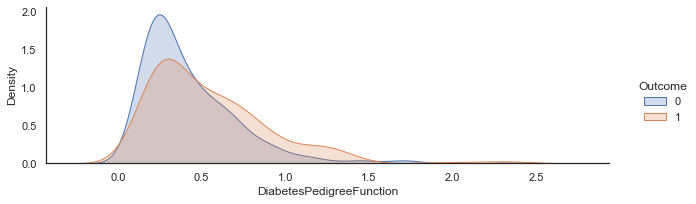

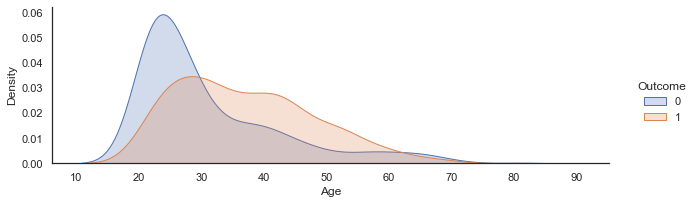

In [26]:
for i in range(len(feature_cols)):
    sns.FacetGrid(df,hue="Outcome",aspect=3,margin_titles=True).map(sns.kdeplot,feature_cols[i],shade= True).add_legend()

### Project Task: Week 3
#### Data Modeling:
#### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

Strategies:- 1. Data modelling is for the prediction of a binary Outcome. Value can be either 0 or 1. 2. A supervised ML classification algorithm can be used 3. Logistic regression needs to checked, since it is good for binary classification 4. Tree based algorithms, also needs to be tried out, since the dataset has outliers. 5. Data Scaling must be done, before modeling 6. Holdout method or KFold CV can be used

In [27]:
# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV

In [28]:
x=df[feature_cols]
y=df['Outcome']

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [30]:
#Feature Scaling
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

#### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [31]:
#Using Logistic Regression Algorithm to the Training Set
classifier_logreg = LogisticRegression(random_state = 0)
classifier_logreg.fit(x_train_scaled, y_train)
y_pred_logreg=classifier_logreg.predict(x_test_scaled)
print('Accuracy of Logistic regression: {}'.format(accuracy_score(y_test,y_pred_logreg)))

Accuracy of Logistic regression: 0.7705627705627706


In [32]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 13)
classifier_knn.fit(x_train_scaled, y_train)
y_pred_knn=classifier_knn.predict(x_test_scaled)
print('Accuracy of KNN : {}'.format(accuracy_score(y_test,y_pred_knn)))

Accuracy of KNN : 0.7792207792207793


In [33]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(x_train_scaled, y_train)
y_pred_svc=classifier_svc.predict(x_test_scaled)
print('Accuracy of SVM-linear: {}'.format(accuracy_score(y_test,y_pred_svc)))

Accuracy of SVM-linear: 0.7662337662337663


In [34]:
#Using SVC-Kernel method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier_svc_rbf = SVC(kernel = 'rbf', random_state = 0,C=1)
classifier_svc_rbf.fit(x_train_scaled, y_train)
y_pred_svc_rbf=classifier_svc_rbf.predict(x_test_scaled)
print('Accuracy of SVM-RBF: {}'.format(accuracy_score(y_test,y_pred_svc_rbf)))

Accuracy of SVM-RBF: 0.7445887445887446


In [35]:
#Using Naive Bayes to use Support Vector Machine Algorithm
# GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train_scaled, y_train)
y_pred_nb=classifier_nb.predict(x_test_scaled)
print('Accuracy of Naive Bayes-Gaussian: {}'.format(accuracy_score(y_test,y_pred_nb)))

Accuracy of Naive Bayes-Gaussian: 0.7532467532467533


In [36]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier_dec = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dec.fit(x_train, y_train)
y_pred_dec=classifier_dec.predict(x_test)
print('Accuracy of Decision Tree Classifier: {}'.format(accuracy_score(y_test,y_pred_dec)))

Accuracy of Decision Tree Classifier: 0.7445887445887446


In [37]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier_rnd = RandomForestClassifier(n_estimators = 9, criterion = 'entropy', random_state = 0)
classifier_rnd.fit(x_train_scaled, y_train)
y_pred_rnd=classifier_rnd.predict(x_test_scaled)
print('Accuracy of Random Forest Classifier: {}'.format(accuracy_score(y_test,y_pred_rnd)))

Accuracy of Random Forest Classifier: 0.7878787878787878


In [38]:
feature_imp=sorted(list(zip(feature_cols,classifier_rnd.feature_importances_)),key=lambda x:x[1],reverse=True)
feature_imp[:10] # Top 10 important features

[('Glucose', 0.2228201379776521),
 ('Age', 0.1517873256817099),
 ('BMI', 0.14719738003933125),
 ('DiabetesPedigreeFunction', 0.13511585970768406),
 ('SkinThickness', 0.09879866678114017),
 ('Insulin', 0.09843081839304385),
 ('Pregnancies', 0.08010429797887891),
 ('BloodPressure', 0.06574551344055982)]

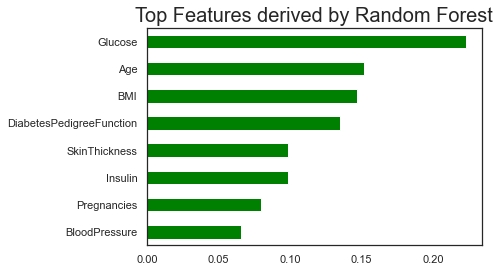

In [39]:
# Plot the top features based on its importance
pd.Series(classifier_rnd.feature_importances_,index=x.columns).nlargest(10).plot(kind='barh',color='green').invert_yaxis()
plt.title('Top Features derived by Random Forest', size=20)
plt.show()

In [40]:
# Feature Selection using RFE
from sklearn.feature_selection import RFE

In [41]:
rfe=RFE(estimator=classifier_logreg,n_features_to_select=4)
rfe.fit(x,y)
for i in sorted(list(zip(feature_cols,rfe.ranking_)), key=lambda x:x[1],reverse=True):
      print(i)

('Insulin', 5)
('SkinThickness', 4)
('BloodPressure', 3)
('Age', 2)
('Pregnancies', 1)
('Glucose', 1)
('BMI', 1)
('DiabetesPedigreeFunction', 1)


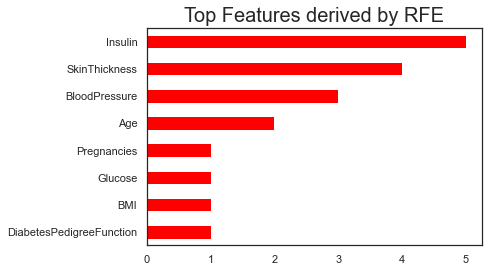

In [42]:
pd.Series(rfe.ranking_,index=x.columns).nlargest(10).plot(kind='barh',color='red').invert_yaxis()
plt.title('Top Features derived by RFE', size=20)
plt.show()

In [43]:
# Using the selected fetures to predict outcome
features_selected =['Insulin','SkinThickness','Age','BloodPressure','Pregnancies']
x_train_new= x_train[features_selected]
x_test_new=x_test[features_selected]

In [44]:
x_train_scaled_new =sc.fit_transform(x_train_new)
x_test_scaled_new=sc.fit_transform(x_test_new)

In [45]:
classifier_rnd_new = RandomForestClassifier(n_estimators = 9, criterion = 'entropy', random_state = 0)
classifier_rnd_new.fit(x_train_scaled_new, y_train)
y_pred_rnd_new=classifier_rnd_new.predict(x_test_scaled_new)
print('Accuracy of Random Forest Classifier with Selected Features: {}'.format(accuracy_score(y_test,y_pred_rnd_new)))

Accuracy of Random Forest Classifier with Selected Features: 0.6536796536796536


In [46]:
# create a model building fn for easy comparison
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

def baseline_model(model,x_train_scaled,y_train,x_test_scaled,y_test,name):
    model.fit(x_train_scaled,y_train)
    
    accuracy     = np.mean(cross_val_score(model, x_train_scaled, y_train, cv=kf, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, x_train_scaled, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, x_train_scaled, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, x_train_scaled, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, x_train_scaled, y_train, cv=kf, scoring='roc_auc'))
    
    y_pred = model.predict(x_test_scaled)
    
    df_models = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                              })   # metrics to be used for comparison later
    return df_models

df_models=pd.concat([baseline_model(classifier_logreg,x_train_scaled,y_train,x_test_scaled,y_test,'Logistic Regression'),
                    baseline_model(classifier_knn,x_train_scaled,y_train,x_test_scaled,y_test,'KNN Classifer'),
                    baseline_model(classifier_svc,x_train_scaled,y_train,x_test_scaled,y_test,'Linear SVC'),
                    baseline_model(classifier_svc_rbf,x_train_scaled,y_train,x_test_scaled,y_test,'SVC-RBF'),
                    baseline_model(classifier_nb,x_train_scaled,y_train,x_test_scaled,y_test,'Gaussian NB'),
                    baseline_model(classifier_dec,x_train_scaled,y_train,x_test_scaled,y_test,'Decision Tree'),
                    baseline_model(classifier_rnd,x_train_scaled,y_train,x_test_scaled,y_test,'Random Forest')], 
                    axis=0).reset_index()
                   
df_models = df_models.drop('index', axis=1)
df_models

,model,accuracy,precision,recall,f1score,rocauc
0,Logistic Regression,0.767065,0.721360,0.592173,0.647155,0.835375
1,KNN Classifer,0.748529,0.675292,0.587449,0.627657,0.809642
2,Linear SVC,0.763361,0.729954,0.566532,0.634171,0.833505
3,SVC-RBF,0.737349,0.665880,0.556140,0.603961,0.824643
4,Gaussian NB,0.750242,0.668436,0.628475,0.646598,0.810263
5,Decision Tree,0.675891,0.559716,0.541430,0.547777,0.646589
6,Random Forest,0.741035,0.672384,0.561538,0.610556,0.791475


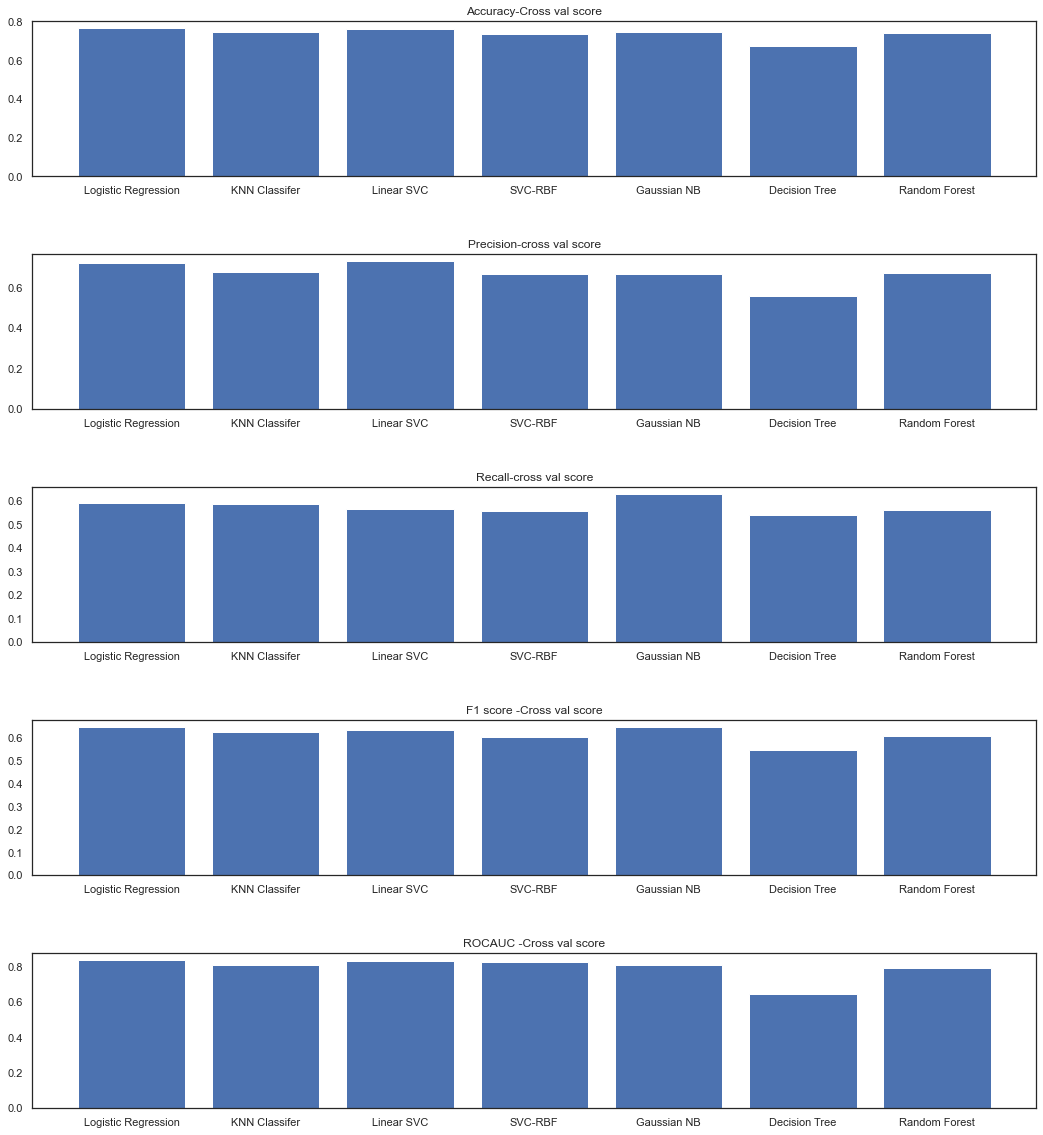

In [47]:
## plot the performance metric scores
fig, ax = plt.subplots(5, 1, figsize=(18, 20))

ax[0].bar(df_models.model, df_models.accuracy)
ax[0].set_title('Accuracy-Cross val score')

ax[1].bar(df_models.model, df_models.precision)
ax[1].set_title('Precision-cross val score')

ax[2].bar(df_models.model, df_models.recall)
ax[2].set_title('Recall-cross val score')

ax[3].bar(df_models.model, df_models.f1score)
ax[3].set_title('F1 score -Cross val score')

ax[4].bar(df_models.model, df_models.rocauc)
ax[4].set_title('ROCAUC -Cross val score')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

### Project Task: Week 4
#### Data Modeling:
#### 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.
#### Random Forest Classifer Evaluation

In [48]:
print(classification_report(y_test,y_pred_rnd))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.69      0.61      0.65        74

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231



In [49]:
print(confusion_matrix(y_test,y_pred_rnd))

[[137  20]
 [ 29  45]]


In [70]:
#pip install yellowbrick

In [51]:
from yellowbrick.classifier import ConfusionMatrix

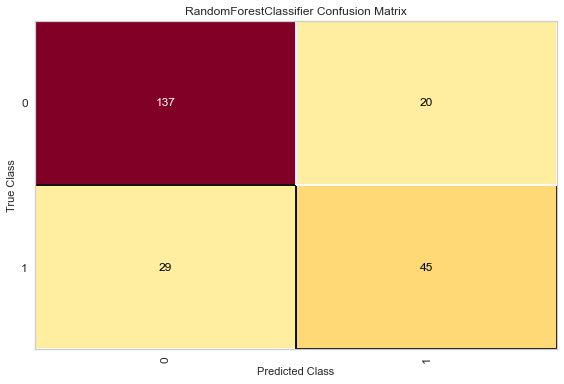

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
cm=ConfusionMatrix(classifier_rnd)
cm.fit(x_train_scaled,y_train)
cm.score(x_test_scaled,y_test)
cm.show()
# TP=45, FP=20
# TN=137,FN=29

#### K Nearest Neighbors Classifier Evluation:-

In [53]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.69      0.57      0.62        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



In [54]:
print(confusion_matrix(y_test,y_pred_knn))

[[138  19]
 [ 32  42]]


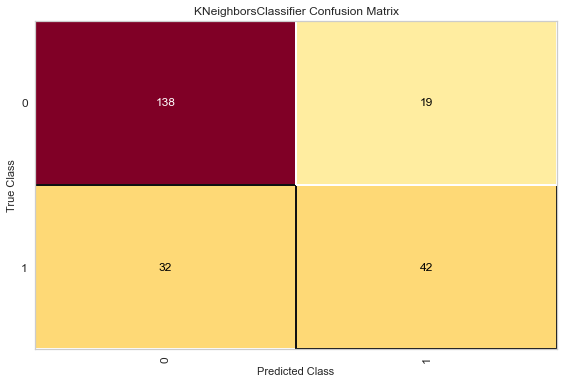

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [55]:
cm=ConfusionMatrix(classifier_knn)
cm.fit(x_train_scaled,y_train)
cm.score(x_test_scaled,y_test)
cm.show()
# TP=42, FP=19
# TN=138,FN=32

Compared to KNN Classifer, the random forest classifer gives better metrics

In [56]:
fpr, tpr, thresholds=roc_curve(y_test,y_pred_rnd)
auc(fpr,tpr)

0.7403597865381305

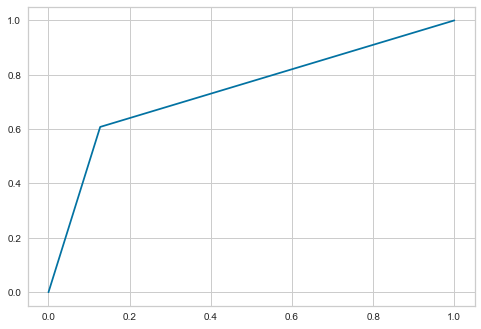

In [57]:
plt.plot(fpr,tpr)

In [58]:
fpr, tpr, thresholds=roc_curve(y_test,y_pred_knn)
auc(fpr,tpr)

0.7232742296436564

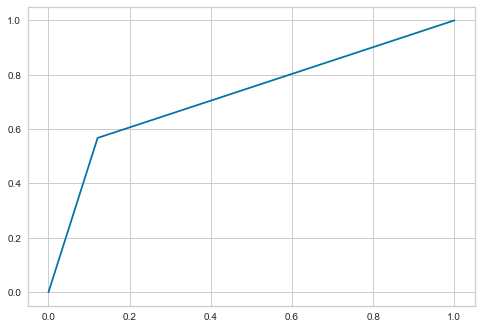

In [59]:
plt.plot(fpr,tpr)

AUC value for Random Forest is better than KNN. (74% compared to 72%)

In [60]:
from sklearn.model_selection import learning_curve

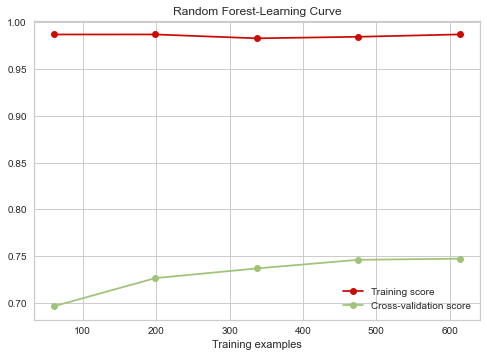

In [61]:
train_sizes, train_scores, test_scores = learning_curve(classifier_rnd, x, y, n_jobs=-1, cv=5, 
                                                        verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Random Forest-Learning Curve")
plt.xlabel("Training examples")
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend()
plt.show()

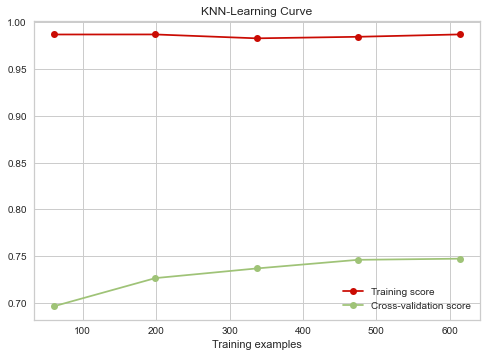

In [62]:
train_sizes, train_scores, test_scores = learning_curve(classifier_rnd, x, y, n_jobs=-1, cv=5, 
                                                        verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("KNN-Learning Curve")
plt.xlabel("Training examples")
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend()
plt.show()

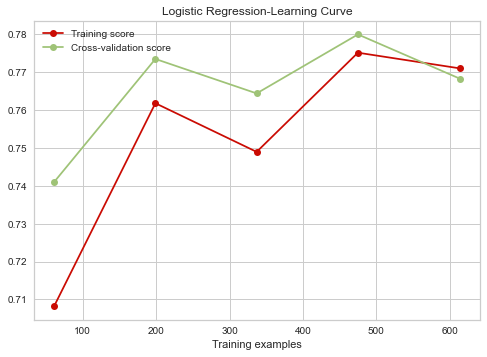

In [63]:
train_sizes, train_scores, test_scores = learning_curve(classifier_logreg, x, y, n_jobs=-1, cv=5, 
                                                        verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Logistic Regression-Learning Curve")
plt.xlabel("Training examples")
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend()
plt.show()


Data models are clearly overfit, since there is a big variance between train scores and test scores. The techniques used ot reduce overfitting are

1. cross validation
2. Regularization
3. Feature Selection
4. Dimensionality Reduction

In [64]:
classifier_svc_reg = SVC(kernel = 'linear', random_state = 0,C=100)
classifier_svc_reg.fit(x_train_scaled, y_train)
y_pred_svc_reg=classifier_svc_reg.predict(x_test_scaled)
print('Accuracy of SVM-linear with Regularization: {}'.format(accuracy_score(y_test,y_pred_svc_reg)))

Accuracy of SVM-linear with Regularization: 0.7662337662337663


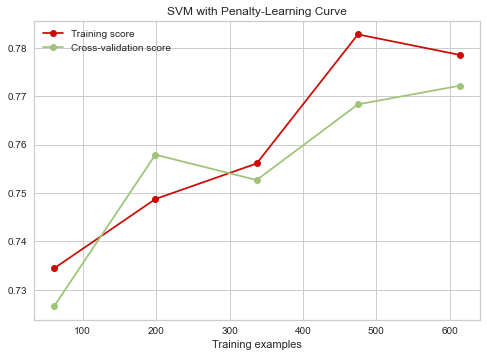

In [65]:
train_sizes, train_scores, test_scores = learning_curve(classifier_svc_reg, x, y, n_jobs=-1, cv=5, 
                                                        verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("SVM with Penalty-Learning Curve")
plt.xlabel("Training examples")
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend()
plt.show()

Model gives good bias variance tradeoff.

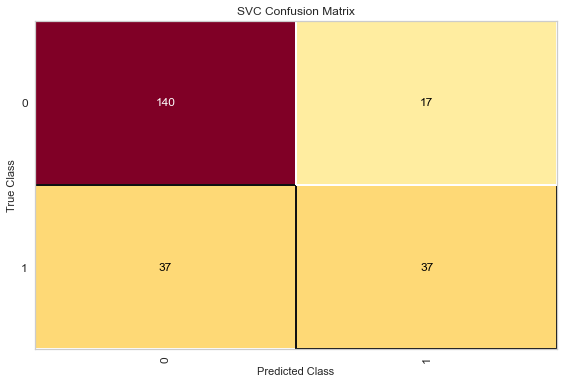

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [66]:
cm=ConfusionMatrix(classifier_svc_reg)
cm.fit(x_train_scaled,y_train)
cm.score(x_test_scaled,y_test)
cm.show()
# TP=37, FP=37
# TN=140,FN=17

In [67]:
print(classification_report(y_test,y_pred_svc_reg))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.69      0.50      0.58        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.75       231



In [68]:
'''
# Handling imbalance data - Rerunning above with resampled data - using oversampling
# create fake sample data into the imbalanced side to balance it out.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = SEED)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train.ravel())

print('X_train_sm.shape:', x_train_sm.shape)
print(pd.value_counts(pd.Series(y_train_sm)))

lassifier_svc_reg_sm = classifier_svc_reg.fit(x_train_sm, y_train_sm)
y_pred = classifier_svc_reg_sm.predict(x_test)
print('Model accuracy is', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
'''

"\n# Handling imbalance data - Rerunning above with resampled data - using oversampling\n# create fake sample data into the imbalanced side to balance it out.\nfrom imblearn.over_sampling import SMOTE\nsm = SMOTE(random_state = SEED)\nx_train_sm, y_train_sm = sm.fit_sample(x_train, y_train.ravel())\n\nprint('X_train_sm.shape:', x_train_sm.shape)\nprint(pd.value_counts(pd.Series(y_train_sm)))\n\nlassifier_svc_reg_sm = classifier_svc_reg.fit(x_train_sm, y_train_sm)\ny_pred = classifier_svc_reg_sm.predict(x_test)\nprint('Model accuracy is', accuracy_score(y_test, y_pred))\nprint(classification_report(y_test, y_pred))\nprint(confusion_matrix(y_test, y_pred))\n"

Linear Support Vector Machine, with regularization is best suited to predict the diabetic outcome

In [69]:
# The most suitable model for the prediction is
# classifier_svc_reg = SVC(kernel = 'linear', random_state = 0,C=100)
# Accuracy of SVM-linear with Regularization: 0.7662337662337663
# Model gives good bias variance tradeoff.
# TP=37, FP=37
# TN=140,FN=17